# CS 6375 Final Project: Android Malware Classification Using Permission Set
https://www.kaggle.com/datasets/saurabhshahane/android-permission-dataset

In [1]:
# download kaggle dataset
!kaggle datasets download --unzip --force "saurabhshahane/android-permission-dataset"

100%|██████████████████████████████████████| 17.4M/17.4M [00:01<00:00, 11.0MB/s]
100%|██████████████████████████████████████| 17.4M/17.4M [00:01<00:00, 10.9MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pd.set_option("display.max_rows", None)
permissions = pd.read_csv("Android_Permission.csv")

## Exploratory Data Analysis

In [30]:
num_samples, num_features = permissions.shape
print(f"Number of samples: {num_samples}\nNumber of features: {num_features}")

Number of samples: 29999
Number of features: 184


In [5]:
permissions.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
permissions.dtypes

App                                                                                        object
Package                                                                                    object
Category                                                                                   object
Description                                                                                object
Rating                                                                                    float64
Number of ratings                                                                           int64
Price                                                                                     float64
Related apps                                                                               object
Dangerous permissions count                                                               float64
Safe permissions count                                                                      int64
Default : Access DRM

In [7]:
permissions.describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
count,29999.000000,2.999900e+04,29999.000000,29795.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,...,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,3.537215,6.852608e+03,0.625707,3.111160,1.353978,0.000300,0.000700,0.0,0.000400,0.000033,...,0.014667,0.087970,0.023801,0.001333,0.000567,0.000400,0.016567,0.039735,0.001500,0.666689
std,1.424685,4.586899e+04,3.222620,3.052602,1.523491,0.017318,0.026449,0.0,0.019997,0.005774,...,0.120219,0.283255,0.152431,0.036492,0.023799,0.019997,0.127645,0.195338,0.038702,0.471405
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,4.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.600000e+01,0.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.400000,7.160000e+02,0.000000,4.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,1.908590e+06,158.070000,30.000000,16.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
target_corr = permissions.corrwith(permissions["Class"], numeric_only=True).sort_values(ascending=False)
target_corr.dropna(inplace=True)
target_corr.drop("Class", inplace=True)
top_neg_corr = target_corr[-5:].sort_values(ascending=True)
top_pos_corr = target_corr[:5].sort_values(ascending=False)
print(f"Top negatively correlated features: \n{top_neg_corr}")
print("*" * 81)
print(f"Top positively correlated features: \n{top_pos_corr}")
print("*" * 81)
print(target_corr)

Top negatively correlated features: 
Rating                                                                  -0.221996
Network communication : view network state (S)                          -0.148566
Network communication : full Internet access (D)                        -0.096051
Your personal information : write Browser's history and bookmarks (D)   -0.087723
Safe permissions count                                                  -0.086361
dtype: float64
*********************************************************************************
Top positively correlated features: 
Price                                                             0.137288
Your location : fine (GPS) location (D)                           0.071757
Your location : mock location sources for testing (D)             0.065737
Services that cost you money : directly call phone numbers (D)    0.054368
Your location : access extra location provider commands (S)       0.046273
dtype: float64
*****************************

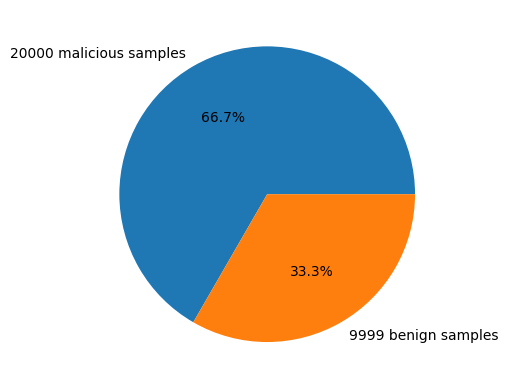

In [9]:
class_names = {0: "benign", 1: "malicious"}
counts = permissions["Class"].value_counts().rename(index=class_names)
plt.pie(counts, labels=[f"{c} {i} samples" for i, c in counts.items()], autopct='%1.1f%%')
plt.show()

<Axes: >

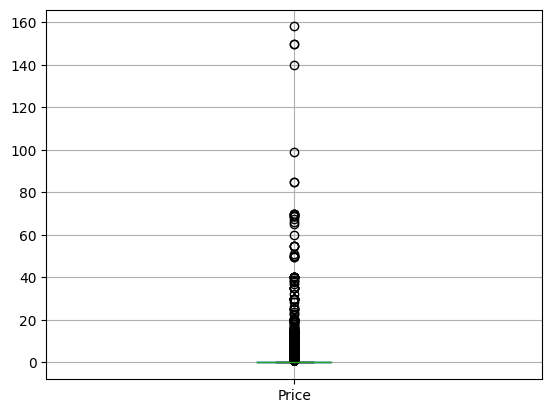

In [10]:
permissions[["Price"]].boxplot()

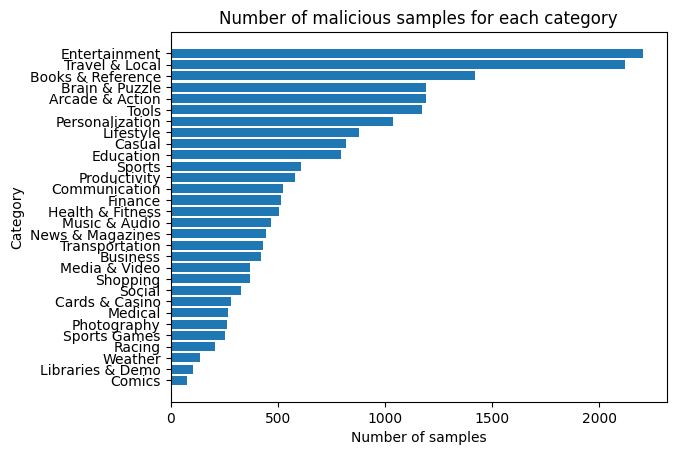

In [11]:
malicious_categories = permissions[permissions["Class"] == 1].groupby("Category")["Class"].count().reset_index(name="Count").sort_values("Count", ascending=True)
all_categories = permissions.groupby("Category")["Class"].count().reset_index(name="Count").sort_values("Count", ascending=True)
malicious_categories["maliciousPercent"] = malicious_categories.Count.div(malicious_categories.Category.map(all_categories.set_index("Category").Count)) * 100
plt.barh(malicious_categories["Category"], malicious_categories["Count"])
plt.title("Number of malicious samples for each category")
plt.ylabel("Category")
plt.xlabel("Number of samples")
plt.show()

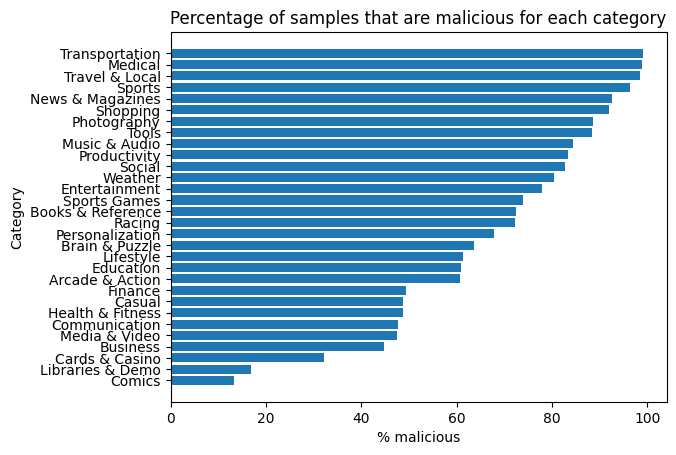

In [12]:
malicious_categories = malicious_categories.sort_values("maliciousPercent", ascending=True)
plt.barh(malicious_categories["Category"], malicious_categories["maliciousPercent"])
plt.title("Percentage of samples that are malicious for each category")
plt.ylabel("Category")
plt.xlabel("% malicious")
plt.show()

## Feature Engineering

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

def preprocess_dataset(df):
    df = df.copy()
    df = df.dropna(axis="index")

    # encode category into non-ordered integers
    ohe = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
    encoded_categories = ohe.fit_transform(df[["Category"]])
    new_categories = [f"Category_{cat}" for cat in ohe.categories_[0]]

    # scale_cols = ["Number of ratings", "Price", "Rating", "Dangerous permissions count", "Safe permissions count"]

    y = df["Class"]
    # drop non categorical text
    df = df.drop(["App", "Package", "Category", "Description", "Related apps", "Class"], axis="columns")
    encoded_df = pd.DataFrame(encoded_categories, columns=new_categories)

    X = pd.concat([df, encoded_df], axis="columns")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=0.7,
        random_state=6375,
    )

    return X_train, X_test, y_train, y_test

In [14]:
X_train, X_test, y_train, y_test = preprocess_dataset(permissions)

## Analysis of Models

In [15]:
def calculate_improvement(old_score, new_score):
    diff = new_score - old_score
    print(f"Original F1 Score: {old_score:.4f}\nTuned F1 Score: {new_score:.4f}\nImprovement: {diff:.4f}")
    return diff

In [16]:
pt_params = {
    "alpha": np.power(10, np.arange(-10, 6, dtype=float)),
    "penalty": ["l2", "l1", "elasticnet", None],
}

svm_params = {
    "penalty": ["l1", "l2"],
    "loss": ["hinge", "squared_hinge"],
    "dual": [True, False],
    "C": np.power(10, np.arange(-10, 1, dtype=float)),
    "random_state": [6375],
    "max_iter": [100000],
}

knn_params = {
    "n_neighbors": [1, 3, 5, 10, 20, 50, 75, 100],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "p": [1, 2],
}

dt_params = {
    "ccp_alpha": np.arange(0, 1.1, 0.1),
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": np.append(np.logspace(0, 9, num=10, base=2, dtype=int), None),
    "max_leaf_nodes": np.append(np.logspace(1, 11, num=11, base=2, dtype=int), None),
    "min_samples_split": np.logspace(1, 11, num=11, base=2, dtype=int),
    "random_state": [6375],
    "splitter": ["best"],
}

rf_params = {
    "n_estimators": np.append(np.power(2, np.arange(1, 9)), 100),
    "ccp_alpha": np.arange(0, 1.1, 0.1),
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": np.append(np.logspace(0, 9, num=10, base=2, dtype=int), None),
    "min_samples_leaf": np.logspace(0, 9, num=10, base=2, dtype=int),
    "max_features": ["sqrt", "log2", None],
    "max_leaf_nodes": np.append(np.logspace(1, 9, num=9, base=2, dtype=int), None),
    "min_samples_split": np.logspace(1, 11, num=11, base=2, dtype=int),
    "random_state": [6375],
}

ada_dt_params = {
    "n_estimators": np.append(np.power(2, np.arange(1, 9)), 50),
    "learning_rate": np.power(10, np.arange(-5, 2, dtype=float)),
    "random_state": [6375],
}

gnb_params = {
    "var_smoothing": np.power(10, np.arange(-15, 15, dtype=float)),
}

lr_params = {
    "penalty": [None, "l2", "l2", "elasticnet"],
    "dual": [False],
    "C": np.power(10, np.arange(-10, 4, dtype=float)),
    "class_weight": [None, "balanced"],
    "random_state": [6375],
    "solver": ["lbfgs", "newton-cholesky"],
    "max_iter": [1000],
}

mlp_params = {
    "hidden_layer_sizes": [(100,), (50, 50), (100, 100), (100, 100, 100), (50, 100, 150)],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "learning_rate_init": np.power(10, np.arange(-5, 2, dtype=float)),
    "momentum": np.arange(0, 1, 0.2),
}

In [17]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

classifiers = {
    "Perceptron": [Perceptron, pt_params],
    "Support Vector Machine": [LinearSVC, svm_params],
    "K-Nearest Neighbors": [KNeighborsClassifier, knn_params],
    "Decision Tree": [DecisionTreeClassifier, dt_params],
    "AdaBoost Decision Tree": [AdaBoostClassifier, ada_dt_params],
    "Random Forest": [RandomForestClassifier, rf_params],
    "Gaussian Naive Bayes": [GaussianNB, gnb_params],
    "Logistic Regression": [LogisticRegression, lr_params],
    "Multi-layer Perceptron": [MLPClassifier, mlp_params],
}

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from pprint import pprint
from time import time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def tune_model(classifier, hyperparameter_grid):
    clf = classifier()
    print("Original parameters:")
    pprint(clf.get_params())


    # standardize numerical columns
    scale_cols = ["Number of ratings", "Price", "Rating", "Dangerous permissions count", "Safe permissions count"]
    numerical_transform = ColumnTransformer([
        ("standardscaler", StandardScaler(), scale_cols), 
    ], remainder="passthrough")

    pipeline = Pipeline([("numerical_transform", numerical_transform), ("clf", clf)])
    # Get predictions and f1 score using base model
    pipeline.fit(X_train, y_train)
    y_pred_base = pipeline.predict(X_test)
    base_score = f1_score(y_test, y_pred_base)

    # create new hyperparameter grid that can be ingested by pipeline
    modified_param_grid = {}
    if isinstance(hyperparameter_grid, dict):
        for k, v in hyperparameter_grid.items():
            modified_param_grid[f"clf__{k}"] = v
    elif isinstance(hyperparameter_grid, list):
        modified_param_grid = []
        for hyperparameter in hyperparameter_grid:
            new_param = {}
            for k, v in hyperparameter.items():
                new_param[f"clf__{k}"] = [v]
            modified_param_grid.append(new_param)

    clf_gs = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=modified_param_grid,
        n_iter=100,
        n_jobs=-1,
        # verbose=5,
        random_state=6375,
        error_score=np.NINF,
        scoring="f1",
        cv=5,
    )

    print("Starting randomized search cross validation")
    start = time()
    clf_gs.fit(X_train, y_train)
    print(f"RandomizedSearchCV took {((time() - start)/60):.2f} minutes")

    # Get predictions and f1 score using tuned model
    y_pred_best = clf_gs.predict(X_test)
    best_score = f1_score(y_test, y_pred_best)
    diff = calculate_improvement(base_score, best_score)

    print("Optimized parameters:")
    pprint(clf_gs.best_params_)

    return clf_gs, base_score, best_score, diff

In [33]:
import warnings
import os
import joblib
import gc
warnings.filterwarnings("ignore")
os.environ["PYTHONWARNINGS"] = "ignore"

results = []

last_estimator = None

for name, (classifier, params) in classifiers.items():
    print(f"Training {name}")
    if name == "AdaBoost Decision Tree" and isinstance(last_estimator["clf"], DecisionTreeClassifier):
        # use tuned decision tree
        params["estimator"] = [last_estimator["clf"]]
    clf_gs, base_score, best_score, diff = tune_model(classifier, params)
    results.append([name, base_score, best_score, diff])
    last_estimator = clf_gs.best_estimator_
    joblib.dump(last_estimator, f"{name}.sav")
    gc.collect()

Training Perceptron
Original parameters:
{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}
Starting randomized search cross validation
RandomizedSearchCV took 0.26 minutes
Original F1 Score: 0.7460
Tuned F1 Score: 0.8102
Improvement: 0.0642
Optimized parameters:
{'clf__alpha': 0.001, 'clf__penalty': 'elasticnet'}
Training Support Vector Machine
Original parameters:
{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}
Starting randomized search cross validation
RandomizedSearchCV took 1.46 minutes
Original F1 Score: 0.8172
Tuned F1 Score: 

In [34]:
results_df = pd.DataFrame(results)
results_df.columns = ["Model Name", "Base Score", "Best Score", "Difference"]
results_df

,Model Name,Base Score,Best Score,Difference
0,Perceptron,0.745970,0.810209,0.064239
1,Support Vector Machine,0.817160,0.818095,0.000935
2,K-Nearest Neighbors,0.810871,0.829104,0.018233
3,Decision Tree,0.833333,0.848935,0.015601
4,AdaBoost Decision Tree,0.845142,0.856795,0.011653
5,Random Forest,0.854951,0.849223,-0.005729
6,Gaussian Naive Bayes,0.810417,0.812744,0.002327
7,Logistic Regression,0.818089,0.818379,0.000290
8,Multi-layer Perceptron,0.836797,0.836205,-0.000592
